#House Price Prediction
##By: Mia Yuan

In [75]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import xgboost as xg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os


In [5]:
# Load data and look at the first five rows
df = pd.read_csv("/content/sample_data/house_sales.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#EDA

In [6]:
# Lots of nulls
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,1134
bathrooms,1068
sqft_living,1110
sqft_lot,1044
floors,0
waterfront,0
view,0


In [12]:
# Check for outliers
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
# Fill in all null values with median
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].median())
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].median())

In [20]:
# Confirm no more null values
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [30]:
# Clean up date field
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y%m%d').astype(int)

In [31]:
# Confirm date field is cleaned up
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


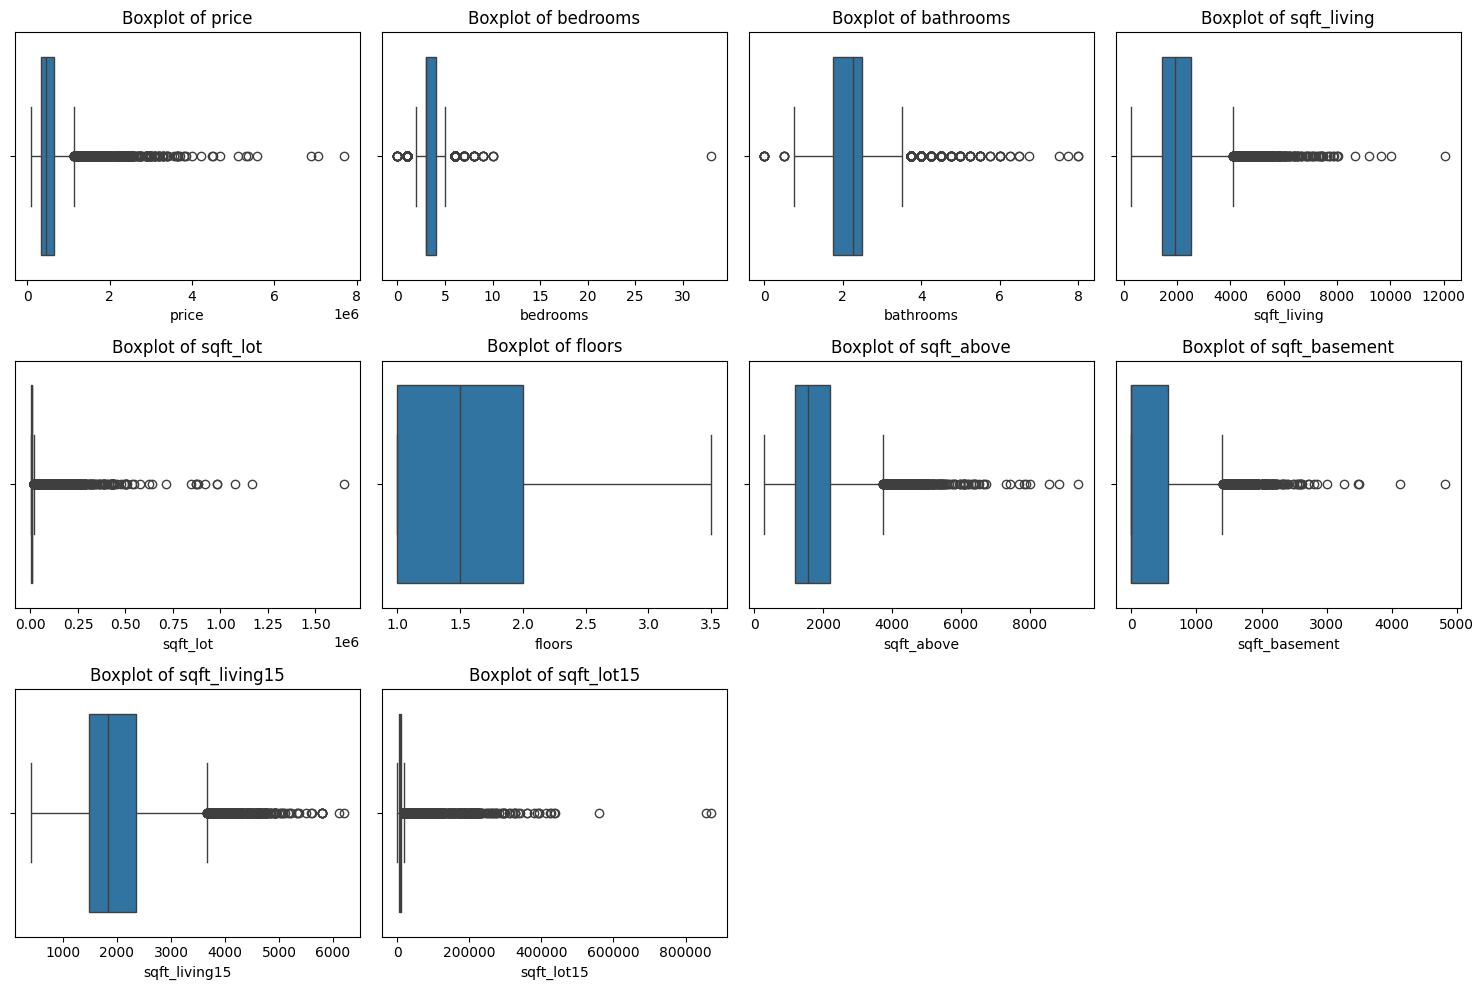

In [33]:
# Plot histogram for numeric values
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Explore correlations

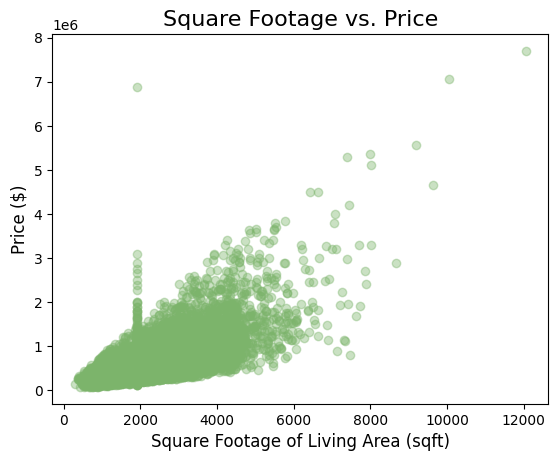

In [42]:
# Scatter plot to shows a positive correlation between sqft_living and price
plt.scatter(df['sqft_living'], df['price'], color='#7cb46b', alpha=0.4)
plt.title("sqft correlation with price")

# Add titles and labels
plt.title("Square Footage vs. Price", fontsize=16)
plt.xlabel("Square Footage of Living Area (sqft)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

# Show the plot
plt.show()

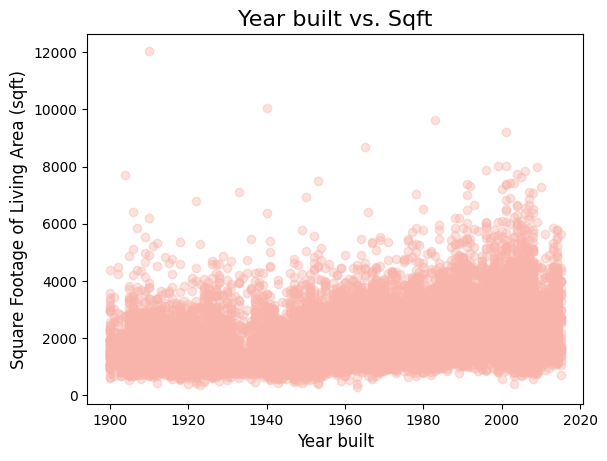

In [43]:
# Scatter plot to shows houses are getting bigger and bigger
plt.scatter(df['yr_built'], df['sqft_living'], color='#f8b4aa', alpha=0.4)
plt.title("sqft correlation with price")

# Add titles and labels
plt.title("Year built vs. Sqft", fontsize=16)
plt.xlabel("Year built", fontsize=12)
plt.ylabel("Square Footage of Living Area (sqft)", fontsize=12)


# Show the plot
plt.show()

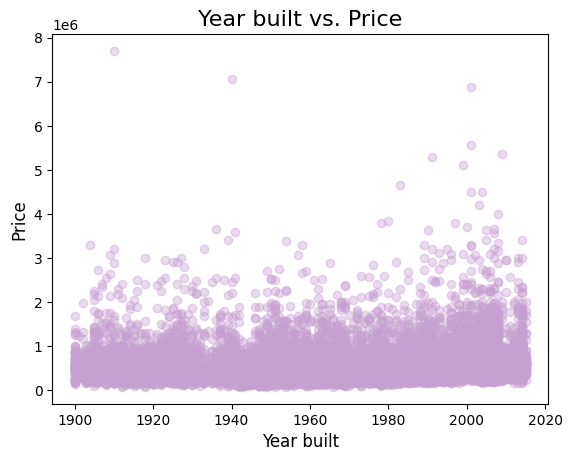

In [46]:
# Scatter plot to shows a slight positive correlation between year built and price
plt.scatter(df['yr_built'], df['price'], color='#c7a0d2', alpha=0.4)
plt.title("sqft correlation with price")

# Add titles and labels
plt.title("Year built vs. Price", fontsize=16)
plt.xlabel("Year built", fontsize=12)
plt.ylabel("Price", fontsize=12)


# Show the plot
plt.show()

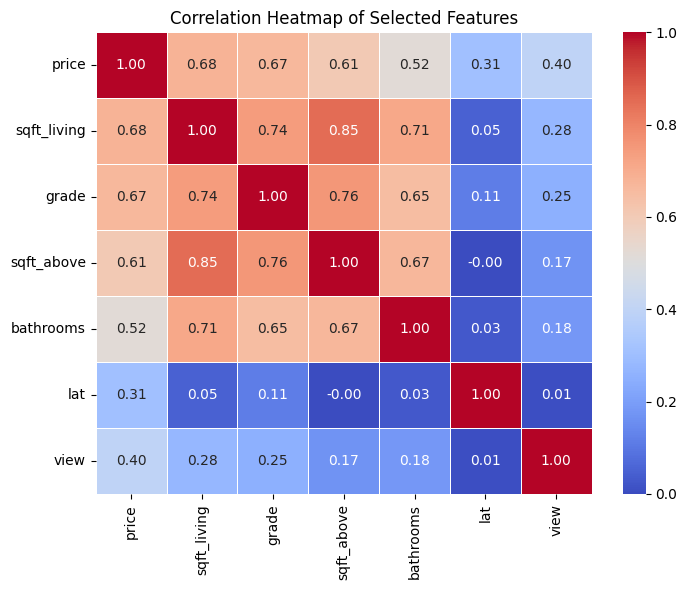

In [50]:
# Select the top features
selected_features = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'lat', 'view']
df_selected = df[selected_features]

# Calculate the correlation matrix for selected features
correlation_matrix = df_selected.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

#Preprocessing


In [51]:
# Choose independent & dependent variables for model
X = df[['date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
       'view','condition','grade','sqft_above','sqft_basement','yr_built',
       'yr_renovated','zipcode','lat','long']]
y = df[['price']]

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape for each one
print(X_train.shape)
print(X_test.shape)
print("Now for the Target: ")
print(y_train.shape)
print(y_test.shape)

(17290, 17)
(4323, 17)
Now for the Target: 
(17290, 1)
(4323, 1)


In [61]:
# Peek at the data
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
6325,20140527,3.0,1.75,1780.0,13095.0,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152
13473,20150310,2.0,1.00,1000.0,3700.0,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290
17614,20150226,3.0,1.00,1080.0,7486.0,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335
16970,20150108,3.0,2.25,2090.0,7500.0,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172
20868,20150417,2.0,2.50,1741.0,1439.0,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209


In [62]:
y_train.head()

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0


#Building Models

## Linear Regression

In [63]:
# Initialize linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict the test data
lin_pred = linear_reg_model.predict(X_test)
lin_pred

array([[ 445609.06482911],
       [ 738346.95291131],
       [1225142.59573592],
       ...,
       [ 406511.39561334],
       [ 614929.64017844],
       [ 426542.55870891]])

In [94]:
# Evaluate the model
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
r2 = r2_score(y_test, lin_pred)

print("Mean Squared Error:", lin_rmse)
print("R-squared:", r2)

Mean Squared Error: 212967.3654234111
R-squared: 0.6999862078074022


## Random Forest Regression

In [78]:
# Initialize RandomForestRegressor with 100 estimators and number 42 for seed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [82]:
# Make predictions
rf_pred = rf_model.predict(X_test)

In [86]:
# Evaluate with root mean square error, R-squared
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R-squared:", rf_r2)

Random Forest RMSE: 140904.29600908863
Random Forest R-squared: 0.8686701123643705


## Feature Importance Visualization

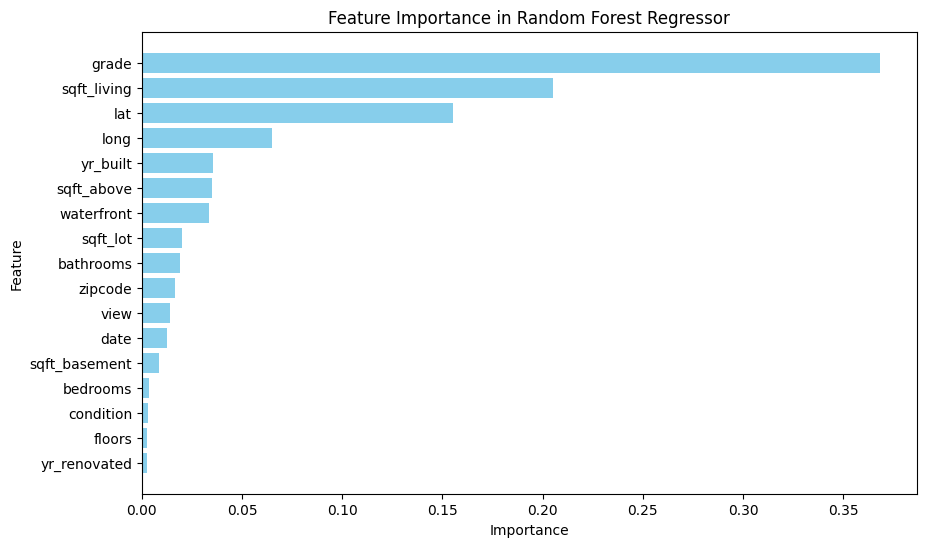

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns  # Get feature names from training data
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Regressor")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


#Make prediction of sample house

In [90]:
# Sample house with some made-up numbers https://www.zillow.com/homedetails/503-11th-Ave-E-Seattle-WA-98102/352516698_zpid/
bedrooms = 4
bathrooms = 2
sqft_living = 1889
sqft_above = 1889
sqft_basement = 0
sqft_lot = 1889
floors = 1
waterfront = 0
view = 0
yr_built = 2024
yr_renovated = 2024
date = 20240101
lat = 47.623130
long = -122.317890
zipcode = 98102
grade = 8
condition = 7

# Generate 1 row of X_test
ex_house = pd.DataFrame([[date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront,
                         view, condition, grade, sqft_above, sqft_basement, yr_built,
                         yr_renovated, zipcode, lat, long]],
                       columns=["date", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront",
                         "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built",
                         "yr_renovated", "zipcode", "lat", "long"])

In [92]:
# Make prediction
print("The house is estimated to be $" + str(rf_model.predict(ex_house)[0]))

The house is estimated to be $797734.45


#Project Summary
In this project, we tried to predict house prices based on a variety of features. We began by conducting exploratory data analysis (EDA) to understand data distributions, identify correlations, and address missing values. After that, we built and evaluated two models: a Linear Regression model and a Random Forest Regressor for more complex relationships.

We use Root Mean Sqaure Error and R-squared as evaluation metrics. RMSE evaluates the accuracy of the regression models, showing the magnitude of the errors between the predicted values and actual values. We can see the Random Forest Model has a much small RMSE, indicating it is more accurate and the predicted value is closer to the actual value.

We used R-squared to evaluate how well the models explains the variance in traget variable. The linear regression model had R-squared value of 70%, meaning only 70% of the variance in the house price is explained by our selected features. Whereas the random forest model had a r-squared value of 87%, showing it can better explain the variances in the target model with the selected features.

Therefore, we can see the Random Forest model is more accurate and captured more variance in price.

Lastly, we visualized feature importances to see which features most influence price. We can see grade, sqft and location are the main driving factors in property price.